<a href="https://colab.research.google.com/github/srikarthadaka/data_science/blob/main/Classification_sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Classification Project: Sonar rocks or mines

# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sonar.all-data.csv to sonar.all-data.csv


In [4]:
data = pd.read_csv("sonar.all-data.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [7]:
# class distribution
print(data.groupby(60).size())

60
M    111
R     97
dtype: int64


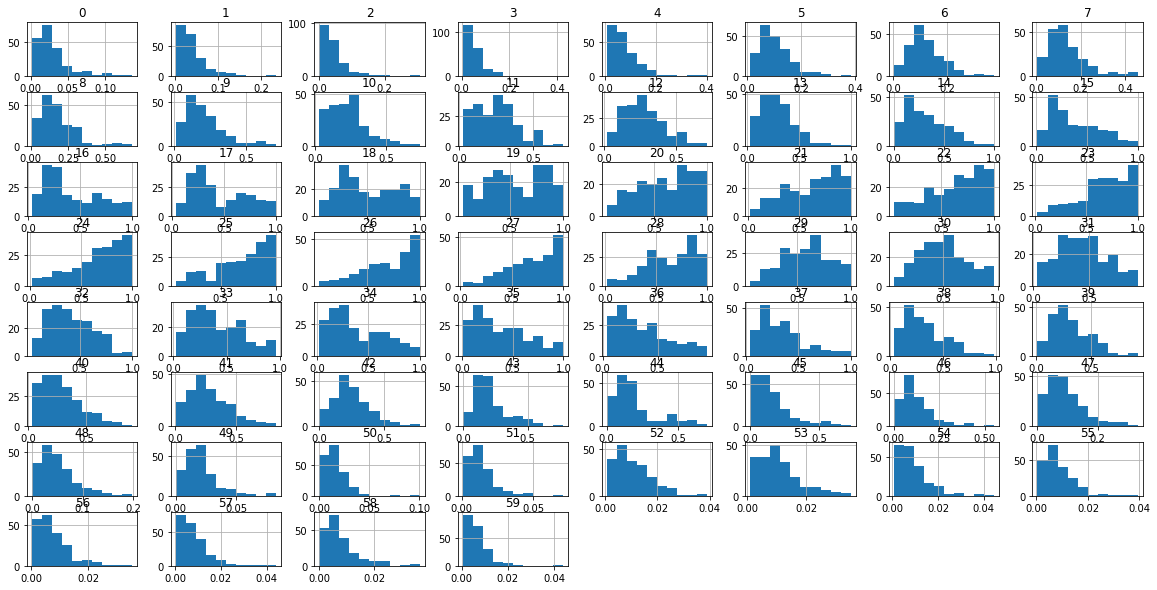

In [10]:
# histograms
data.hist(figsize=(20, 10))
pyplot.show()

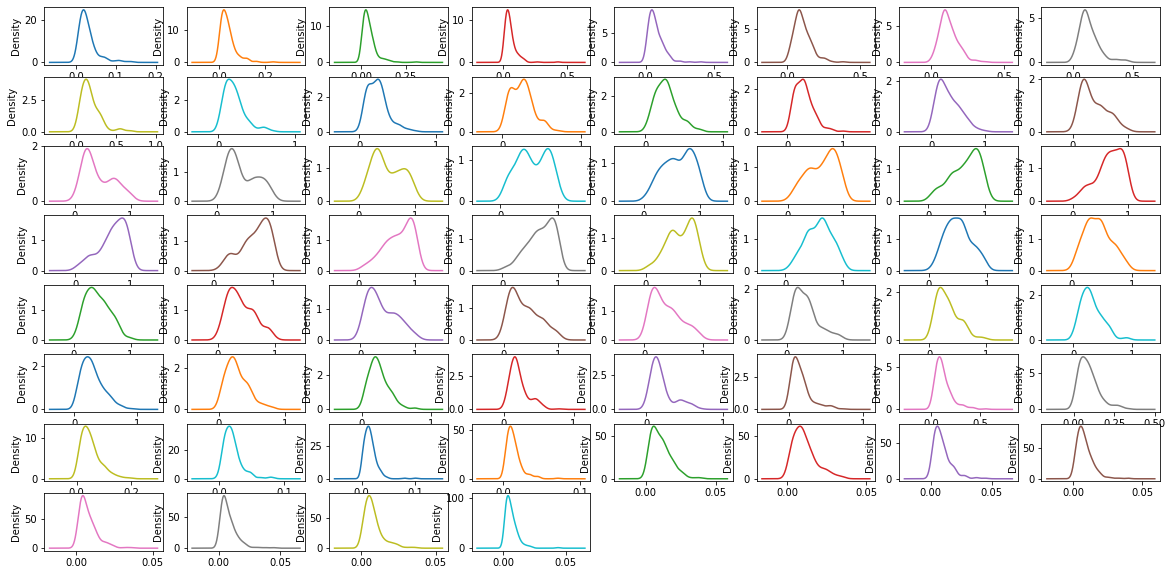

In [15]:
# density
data.plot(kind='density',
             figsize=(20, 10),
             subplots=True,
             layout=(8, 8),
             sharex=False,
             legend=False)
pyplot.show()

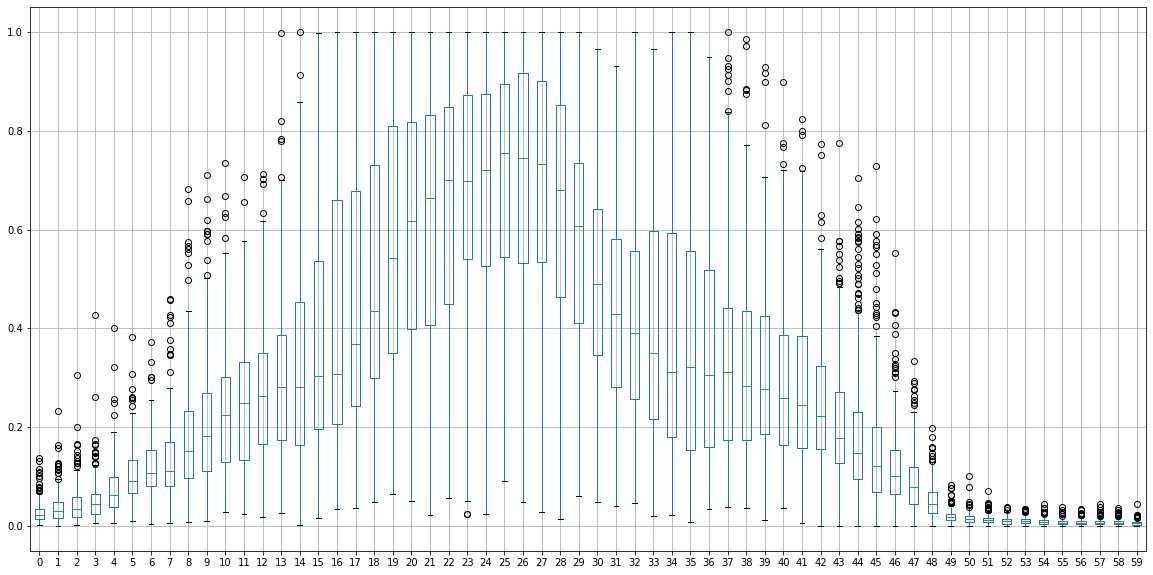

In [17]:
data.boxplot(figsize=(20, 10))

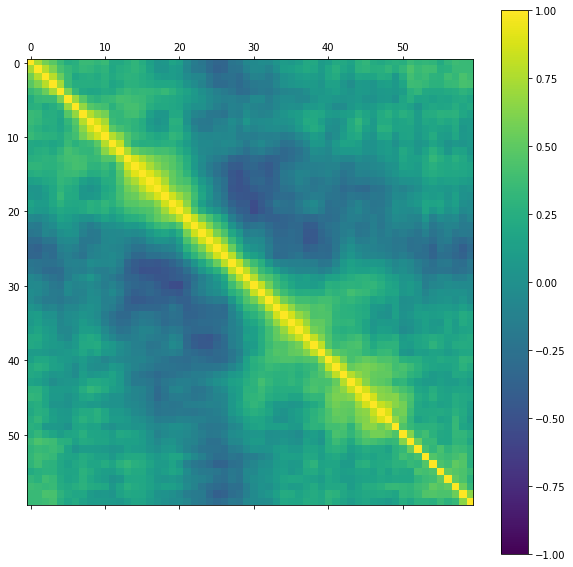

In [21]:
# correlation matrix
fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [22]:
# Split-out validation dataset
array = data.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [23]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Check which algorithm is best Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769485 (0.100510)
KNN: 0.808088 (0.067507)
CART: 0.723897 (0.108981)
NB: 0.648897 (0.141868)
SVM: 0.776471 (0.090411)


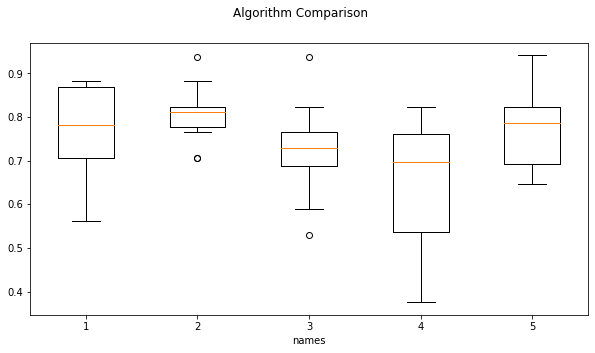

In [27]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
pyplot.boxplot(results)
#ax.set_xticklabels(names)
pyplot.xlabel('names')
pyplot.show()

In [28]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.740441 (0.094668)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.723162 (0.097949)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


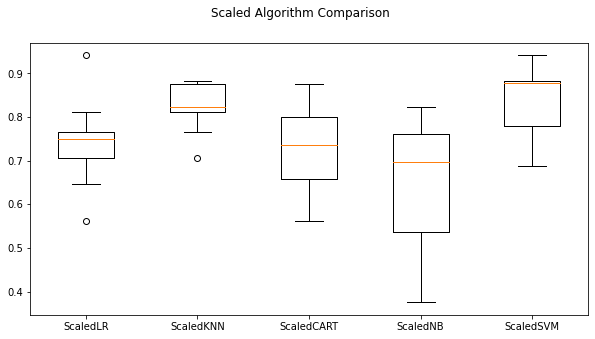

In [31]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,5))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [32]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=None)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold)

grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.850000 using {'n_neighbors': 1}


In [33]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [34]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.850000 (0.059686) with: {'n_neighbors': 1}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.710294 (0.109505) with: {'n_neighbors': 21}


In [35]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

#c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0,2.2,2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(kernel=kernel_values)  #Regularization parameter. The strength of the regularization is inversely proportional to C
model = SVC()


kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold)

grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" %
      (grid_result.best_score_, grid_result.best_params_))

Best: 0.836397 using {'kernel': 'rbf'}


In [36]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.752574 (0.098883) with: {'kernel': 'linear'}
0.781985 (0.101194) with: {'kernel': 'poly'}
0.836397 (0.088697) with: {'kernel': 'rbf'}
0.752574 (0.070872) with: {'kernel': 'sigmoid'}


In [37]:
# ensembles
ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.819853 (0.058293)
GBM: 0.829044 (0.143517)
RF: 0.843015 (0.085308)
ET: 0.842279 (0.079287)


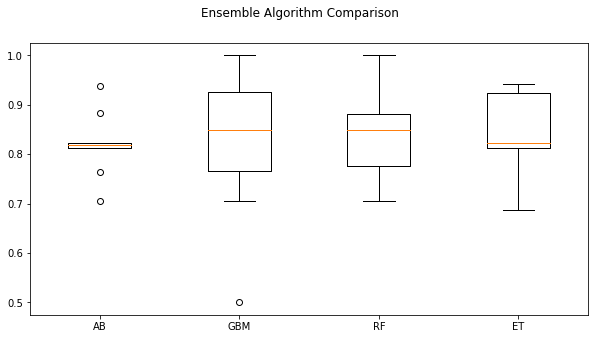

In [39]:
# Compare Ensemble Algorithms
fig = pyplot.figure(figsize=(10,5))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [42]:
#Finalize Model
# Prepare the model
array = data.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(kernel='rbf')
model.fit(rescaledX, Y_train)

SVC()

In [41]:
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
predictions

array(['R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)

In [43]:
print(accuracy_score(Y_validation, predictions))

0.8333333333333334


In [44]:
print(confusion_matrix(Y_validation, predictions))

[[23  4]
 [ 3 12]]


In [45]:
#Model saving
from pickle import dump
from pickle import load

In [51]:
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open('filename', 'wb'))

In [47]:
# load the model from disk
loaded_model = load(open('filename', 'rb'))

result = loaded_model.score(rescaledValidationX, Y_validation)
print(result)

0.8333333333333334


In [50]:
Y_validation


array(['R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)